# 给基金“贴标签”

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import config 

In [7]:
db = config.DB_CONFIG
safe_pass =quote_plus(db['password'])
conn_str = f"mysql+pymysql://{db['user']}:{safe_pass}@{db['host']}:{db['port']}/{db['database']}"
engine = create_engine(conn_str)

In [12]:
print('🚀 从阿里云读取国泰证券数据...')
sql = "SELECT nav_date,daily_growth FROM fund_nav_history WHERE fund_code = '012363'"
df = pd.read_sql(sql,engine)

🚀 从阿里云读取国泰证券数据...


In [18]:
df['心情'] = df['daily_growth'].apply(lambda x: '🍖 吃大肉' if x > 2.0 else ('👊 遭毒打' if x < -2.0 else '🐟 摸鱼中'))
print('\n样本抽取 (随机看5天):')
print(df.sample(5))
print('-'*30)
print('📊 统计结果：')
counts = df['心情'].value_counts()
print(counts)
print('-'*30)
print(f"吃肉概率: {counts.get('🍖 吃大肉', 0) / len(df) * 100:.2f}%")


样本抽取 (随机看5天):
        nav_date  daily_growth     心情
777   2024-07-26          1.73  🐟 摸鱼中
517   2023-07-05         -0.66  🐟 摸鱼中
415   2023-02-03         -0.54  🐟 摸鱼中
14    2021-06-09         -1.02  🐟 摸鱼中
1026  2025-08-06          0.30  🐟 摸鱼中
------------------------------
📊 统计结果：
心情
🐟 摸鱼中    968
🍖 吃大肉     79
👊 遭毒打     66
Name: count, dtype: int64
------------------------------
吃肉概率: 7.10%


# 寻找“幸运月” (Seasonality Analysis)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import config 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [24]:
db = config.DB_CONFIG
safe_pass = quote_plus(db['password'])
conn_str = f"mysql+pymysql://{db['user']}:{safe_pass}@{db['host']}:{db['port']}/{db['database']}"
engine = create_engine(conn_str)

In [25]:
print('🚀 正在分析国泰证券的季节性规律...')
sql = "SELECT nav_date,daily_growth FROM fund_nav_history WHERE fund_code = '012363'"
df = pd.read_sql(sql,engine)
df['nav_date'] = pd.to_datetime(df['nav_date'])

🚀 正在分析国泰证券的季节性规律...


In [26]:
df['月份'] = df['nav_date'].dt.month 
monthly_return = df.groupby('月份')['daily_growth'].mean()
monthly_win_rate = df.groupby('月份')['daily_growth'].apply(lambda x:(x>0).mean()*100)


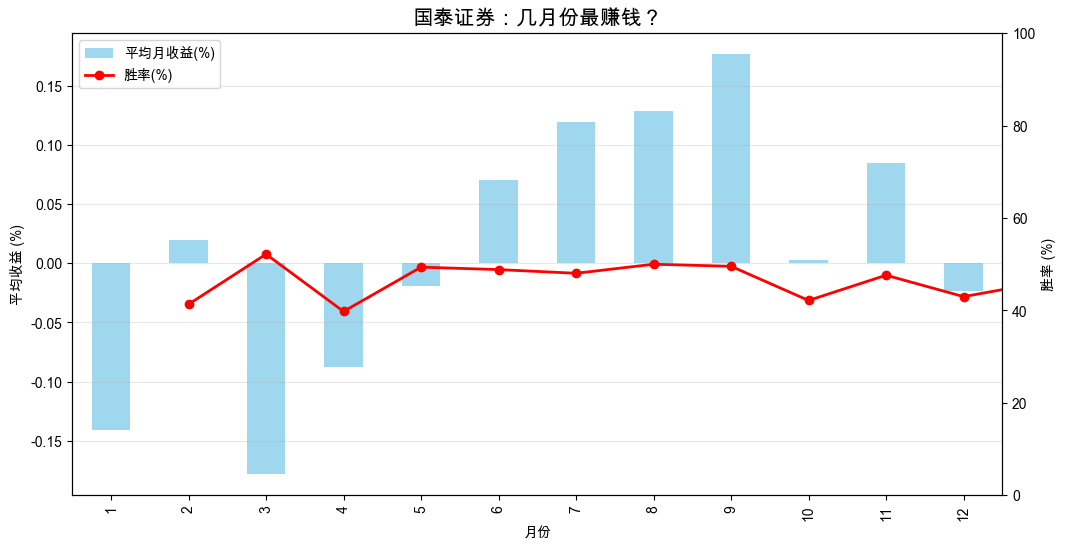

In [30]:
fig,ax1=plt.subplots(figsize = (12,6))
monthly_return.plot(kind='bar',ax=ax1,color='skyblue',alpha=0.8,label = '平均月收益(%)')
ax1.set_ylabel('平均收益 (%)')
ax1.set_title('国泰证券：几月份最赚钱？',fontsize = 15)
ax1.grid(True,axis='y',alpha=0.3)
ax2 = ax1.twinx()
monthly_win_rate.plot(kind='line',ax=ax2,color='red',marker='o',linewidth=2,label='胜率(%)')
ax2.set_ylabel('胜率 (%)')
ax2.set_ylim(0,100)
lines,labels=ax1.get_legend_handles_labels()
line2,labels2 =ax2.get_legend_handles_labels()
ax1.legend(lines+line2,labels+labels2,loc='upper left')
plt.show()

In [31]:
best_month = monthly_return.idxmax()
worst_month = monthly_return.idxmin()
print(f'🏆 历史上最赚钱的是:{best_month}月(平均涨{monthly_return[best_month]:.2f}%)')
print(f'💀 历史上最亏钱的是:{worst_month}月(平均跌{monthly_return[worst_month]:.2f}%')

🏆 历史上最赚钱的是:9月(平均涨0.18%)
💀 历史上最亏钱的是:3月(平均跌-0.18%


/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/

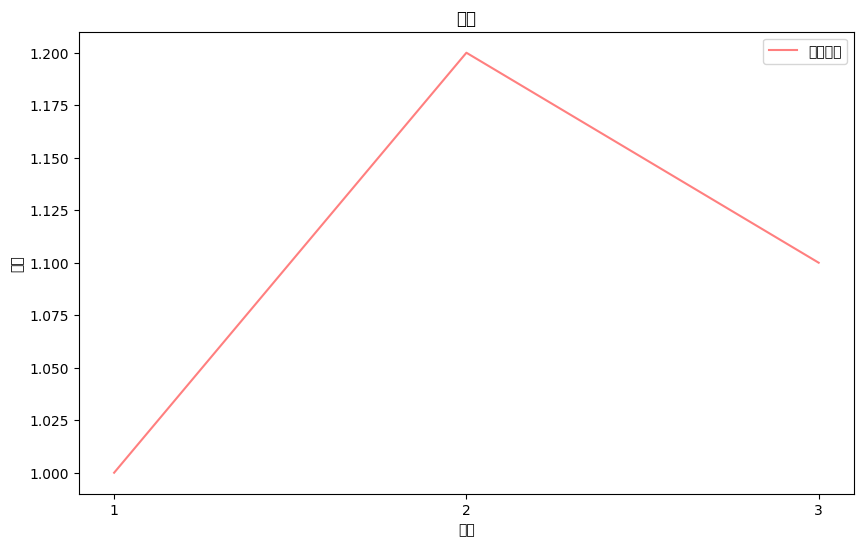

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
date = ['1','2','3']
data = [1.0,1.2,1.1]
plt.figure(figsize=(10,6))
plt.plot(date, data, color='red', alpha=0.5, label='我的净值')
plt.title('测试')
plt.xlabel('日期')
plt.ylabel('净值')
plt.legend()
plt.show()